# Question 4: 
# Can duration of a movie affect its popularity and profitability?

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import int64
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import datasets and preview general information

## 1) 'imdb_basic' dataset

In [2]:
imdb_basic = pd.read_csv('data/cleaned_imdb_basic.csv')
print(imdb_basic.shape)
print(imdb_basic.isna().sum())
imdb_basic.head()

(136702, 7)
Unnamed: 0          0
tconst              0
primary_title       0
original_title     19
start_year          0
runtime_minutes     0
genres              0
dtype: int64


,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
2,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.0,"Comedy,Drama"
3,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


## 2) 'tmdb_movie' dataset

In [3]:
tmdb_movie = pd.read_csv('data/cleaned_tmdb_movie.csv')
print(tmdb_movie.shape)
print(tmdb_movie.isna().sum())
tmdb_movie.head()

(26334, 9)
id                0
original_title    0
popularity        0
release_date      0
title             0
vote_average      0
vote_count        0
month             0
day_of_week       0
dtype: int64


,id,original_title,popularity,release_date,title,vote_average,vote_count,month,day_of_week
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,Friday
1,10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,Friday
2,10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,Friday
3,27205,Inception,27.920,2010-07-16,Inception,8.3,22186,7,Friday
4,32657,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2,Thursday


## 3) 'tn_budget' dataset

In [10]:
tn_budget = pd.read_csv('data/cleaned_tn_budget.csv')
print(tn_budget.shape)
print(tn_budget.isna().sum())
tn_budget.head()

(5782, 6)
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Create new SQL databases and import existing dataframes to them

In [15]:
# Create a new SQL database
conn = sqlite3.connect('movie_runtime.db')
cur = conn.cursor()

In [16]:
# Create a new table 'run_time' in the SQL database
cur.execute('''CREATE TABLE run_time(tconst INTEGER,
                                     primary_title TEXT,
                                     original_title TEXT,
                                     start_year INTEGER,
                                     runtime_minutes REAL,
                                     genres TEXT);''')
conn.commit()

In [17]:
# Convert 'imdb_basic' dataframe to SQL
imdb_basic.to_sql('run_time', conn, if_exists='replace')

In [18]:
# Review the data from 'run_time' table
cur.execute('''SELECT * FROM run_time;''')
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [i[0] for i in cur.description]
df1.head()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
2,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.0,"Comedy,Drama"
3,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [19]:
# Create a new table 'movie_pop' in the SQL database
cur.execute('''CREATE TABLE movie_pop(id INTEGER,
                                      original_title TEXT,
                                      popularity REAL,
                                      release_date DATE,
                                      title TEXT,
                                      vote_average REAL,
                                      vote_count INTEGER);''')
conn.commit()

In [20]:
# Convert 'tmdb_movie' dataframe to SQL
tmdb_movie.to_sql('movie_pop', conn, if_exists='replace')

In [21]:
# Review the data from 'movie_pop' table
cur.execute('''SELECT * FROM movie_pop;''')
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [i[0] for i in cur.description]
df2.head()

,id,original_title,popularity,release_date,title,vote_average,vote_count
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19 00:00:00,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,How to Train Your Dragon,28.734,2010-03-26 00:00:00,How to Train Your Dragon,7.7,7610
2,10138,Iron Man 2,28.515,2010-05-07 00:00:00,Iron Man 2,6.8,12368
3,27205,Inception,27.920,2010-07-16 00:00:00,Inception,8.3,22186
4,32657,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11 00:00:00,Percy Jackson & the Olympians: The Lightning T...,6.1,4229


In [22]:
# Create a new table 'movie_pro' in the SQL database
cur.execute('''CREATE TABLE movie_pro(release_date DATE,
                                      title TEXT,
                                      production_budget INTEGER,
                                      domestic_gross INTEGER,
                                      worldwide_gross INTEGER,
                                      profit INTERGER);''')                                
conn.commit()

In [23]:
# Convert 'tn_budget' dataframe to SQL
tn_budget.to_sql('movie_pro', conn, if_exists='replace')

In [24]:
# Review the data from 'movie_pro' table
cur.execute('''SELECT * FROM movie_pro;''')
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [i[0] for i in cur.description]
df3.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18 00:00:00,Avatar,425000000,760507625,2776345279,2351345279
1,2,2011-05-20 00:00:00,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,4,2015-05-01 00:00:00,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
3,5,2017-12-15 00:00:00,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
4,6,2015-12-18 00:00:00,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220


# Runtime v.s. Popularity

In [25]:
# Connect 'run_time' and 'movie_pop' tables and show the result in DataFrame
cur.execute('''SELECT movie_pop.*, primary_title, run_time.original_title, start_year, runtime_minutes
               FROM run_time
               JOIN movie_pop
               ON run_time.original_title = movie_pop.original_title;''')
runtime_pop = pd.DataFrame(cur.fetchall())
runtime_pop.columns = [i[0] for i in cur.description]
runtime_pop.head()

,id,original_title,popularity,release_date,title,vote_average,vote_count,primary_title,original_title,start_year,runtime_minutes
0,299782,The Other Side of the Wind,9.800,2018-11-02 00:00:00,The Other Side of the Wind,7.0,64,The Other Side of the Wind,The Other Side of the Wind,2018,122.0
1,117856,Bigfoot,2.813,2012-06-30 00:00:00,Bigfoot,2.9,26,Bigfoot,Bigfoot,2017,86.0
2,116977,Foodfight!,4.705,2013-05-07 00:00:00,Foodfight!,2.1,46,Foodfight!,Foodfight!,2012,91.0
3,323498,Return to Babylon,0.877,2013-08-11 00:00:00,Return to Babylon,7.0,1,Return to Babylon,Return to Babylon,2013,75.0
4,112074,Life's a Beach,1.206,2010-01-01 00:00:00,Life's a Beach,3.2,3,Life's a Beach,Life's a Beach,2012,100.0


In [26]:
runtime_pop.describe()

,id,popularity,vote_average,vote_count,start_year,runtime_minutes
count,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000
mean,289112.310005,3.840484,5.775339,288.073011,2014.195754,91.104978
std,147590.252565,4.939271,1.737246,1147.404049,2.474230,24.475161
min,189.000000,0.600000,0.000000,1.000000,2010.000000,1.000000
25%,158907.250000,0.648000,4.900000,2.000000,2012.000000,83.000000
50%,302133.500000,1.719000,5.900000,8.000000,2014.000000,90.000000
75%,407890.000000,5.749000,6.900000,57.000000,2016.000000,100.000000
max,608444.000000,80.773000,10.000000,22186.000000,2018.000000,1834.000000


#### Comment: 
Looking at the table above, it is easy to see that the mean of runtime is around 91 minutes. However, the maximum value of runtime is 1834 minutes which indicates that there are unreasonable outliers. Therefore, we will elminate movies that have duration more than 300 minutes

In [27]:
# Choose only movies that have duration less than 300 minutes and sort it by popularity rate in descending order
cur.execute('''SELECT movie_pop.*, primary_title, run_time.original_title, start_year, runtime_minutes
               FROM run_time
               JOIN movie_pop
               ON run_time.original_title = movie_pop.original_title
               WHERE runtime_minutes < 300
               ORDER BY popularity DESC;''')
sort_runtime_pop = pd.DataFrame(cur.fetchall())
sort_runtime_pop.columns = [i[0] for i in cur.description]
sort_runtime_pop.head()

,id,original_title,popularity,release_date,title,vote_average,vote_count,primary_title,original_title,start_year,runtime_minutes
0,299536,Avengers: Infinity War,80.773,2018-04-27 00:00:00,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,Avengers: Infinity War,2018,149.0
1,245891,John Wick,78.123,2014-10-24 00:00:00,John Wick,7.2,10081,John Wick,John Wick,2014,101.0
2,324857,Spider-Man: Into the Spider-Verse,60.534,2018-12-14 00:00:00,Spider-Man: Into the Spider-Verse,8.4,4048,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0
3,122917,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17 00:00:00,The Hobbit: The Battle of the Five Armies,7.3,8392,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0
4,24428,The Avengers,50.289,2012-05-04 00:00:00,The Avengers,7.6,19673,The Avengers,The Avengers,2012,143.0


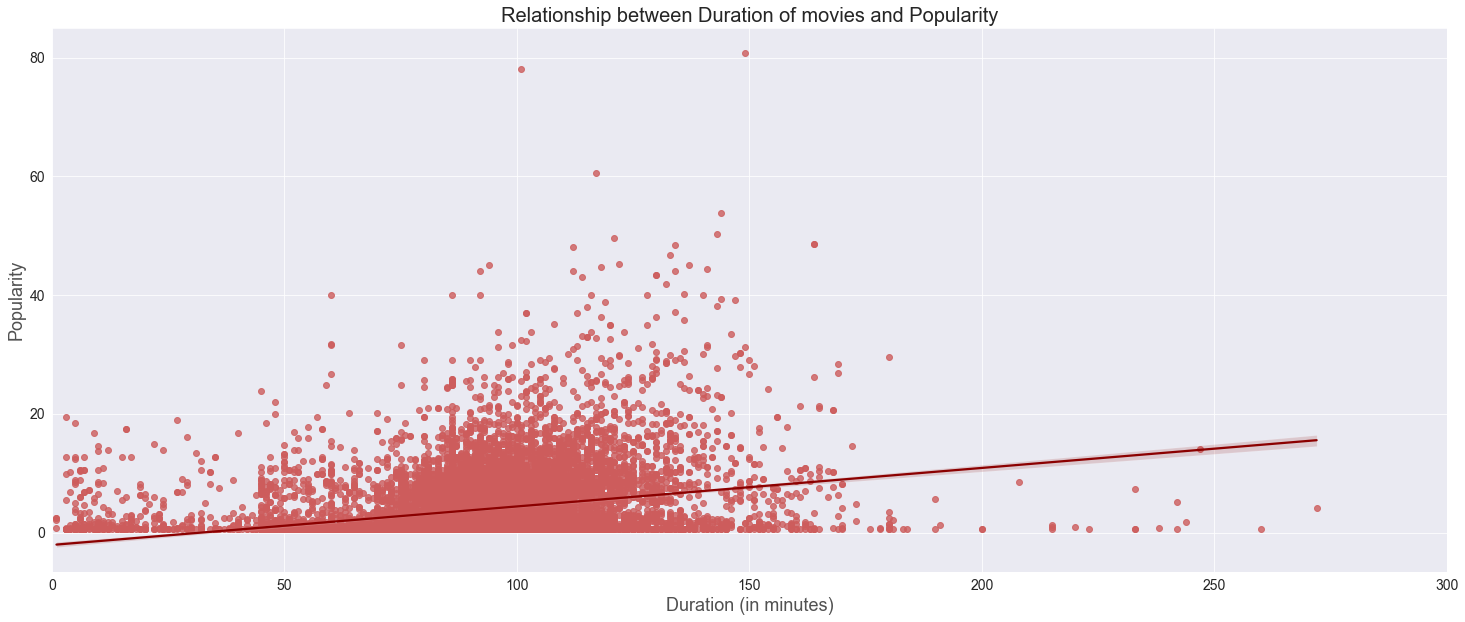

In [28]:
# Graph to show relationship between duration of movies and popularity

plt.figure(figsize=(25, 10))
sns.set_style('darkgrid')
sns.regplot(x='runtime_minutes', y='popularity', data=sort_runtime_pop, 
            scatter_kws={'color': 'indianred'}, line_kws={'color': 'darkred'})
plt.xticks(fontsize=14)
plt.xlim(0, 300)
plt.yticks(fontsize=14)
plt.xlabel('Duration (in minutes)', fontsize=18, alpha=0.8)
plt.ylabel('Popularity', fontsize=18, alpha=0.8)
plt.title('Relationship between Duration of movies and Popularity', fontsize=20)
plt.show()

In [29]:
# Define a function to calculate the correlation
import math
def mean_normalize(var):
    n = len(var)
    total = sum(var)
    mean = total / n
    
    norm = []
    for element in var:
        difference = (element - mean)
        norm.append(difference)
    return norm

def dot_product(x, y):
    sum_product = 0
    for element in range(len(x)):
        product = x[element] * y[element]
        sum_product += product
    return sum_product

def correlation(var1, var2):
    
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    prod = dot_product(x, y)
    
    sq_x = [i * i for i in x]
    sq_y = [i * i for i in y]
    prod2 = dot_product(sq_x, sq_y)
    corr = round((prod / math.sqrt(sum(sq_x) * sum(sq_y))), 2)
    return corr

# Calculate the correlation between runtime and popularity
print('Correlation value between runtime and popularity: ', 
      (correlation(sort_runtime_pop['runtime_minutes'], sort_runtime_pop['popularity'])))

Correlation value between runtime and popularity:  0.26


#### Comment:
According to the graph and the correlation value, the duration of a movie does not have distinct effect or does not have correlation with the popularity 

# Runtime v.s. Profitability 

In [30]:
# Connect 'run_time' and 'movie_pro' tables, 
# choose only movies that have duration less than 300 minutes and have positive profit
# show the result in DataFrame
cur.execute('''SELECT movie_pro.*, original_title, start_year, runtime_minutes
               FROM run_time
               JOIN movie_pro
               ON run_time.original_title = movie_pro.title
               WHERE runtime_minutes < 300 AND profit > 0;''')
runtime_pro = pd.DataFrame(cur.fetchall())
runtime_pro.columns = [i[0] for i in cur.description]
runtime_pro.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit,original_title,start_year,runtime_minutes
0,21,2015-06-19 00:00:00,The Overnight,200000,1109808,1165996,965996,The Overnight,2010,88.0
1,37,2013-12-25 00:00:00,The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,The Secret Life of Walter Mitty,2013,114.0
2,67,2014-09-19 00:00:00,A Walk Among the Tombstones,28000000,26017685,62108587,34108587,A Walk Among the Tombstones,2014,114.0
3,34,2015-06-12 00:00:00,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,2015,124.0
4,4,2012-04-13 00:00:00,The Three Stooges,30000000,44338224,54052249,24052249,The Three Stooges,2012,92.0


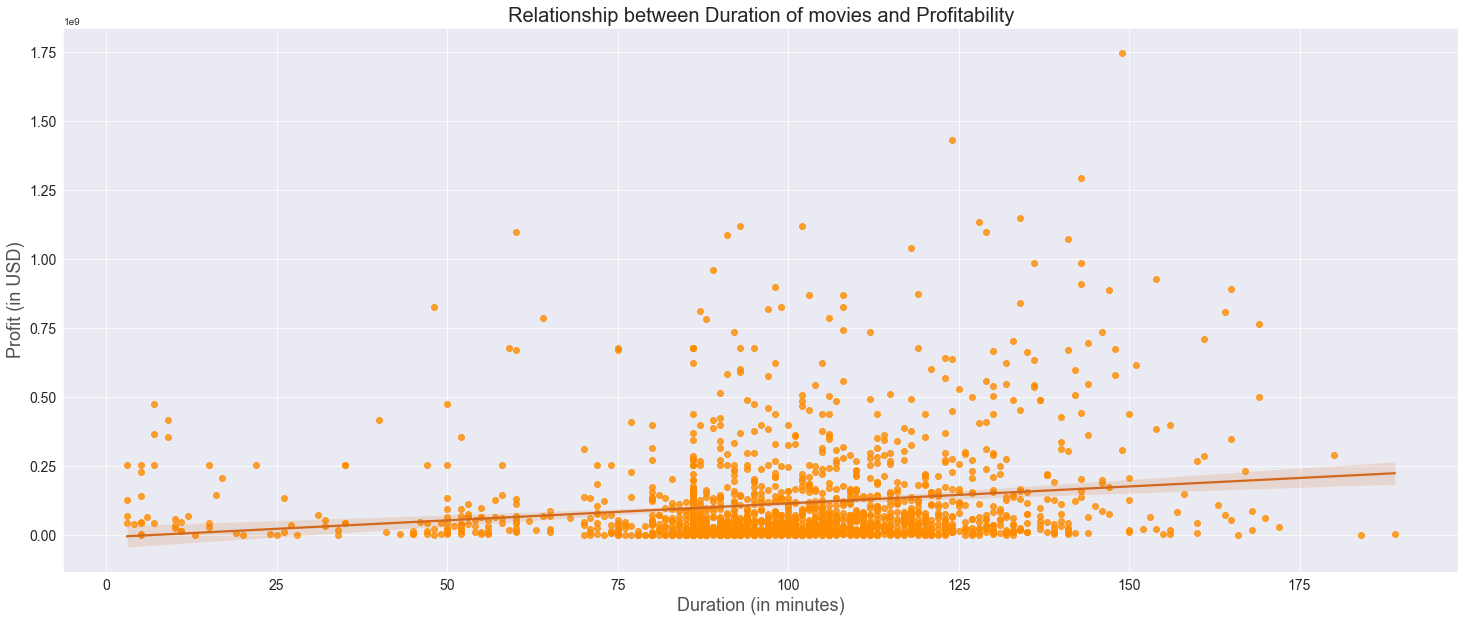

In [31]:
# Graph to show relationship between duration of movies and profitability 

plt.figure(figsize=(25, 10))
sns.set_style('darkgrid')
sns.regplot(x='runtime_minutes', y='profit', data=runtime_pro, 
            scatter_kws={'color': 'darkorange'}, line_kws={'color': 'chocolate'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Duration (in minutes)', fontsize=18, alpha=0.8)
plt.ylabel('Profit (in USD)', fontsize=18, alpha=0.8)
plt.title('Relationship between Duration of movies and Profitability', fontsize=20)
plt.show()

In [32]:
#Calculate the correlation between runtime and profitability
print('Correlation value between runtime and profitability: ', 
      (correlation(runtime_pro['runtime_minutes'], runtime_pro['profit'])))

Correlation value between runtime and profitability:  0.17


#### Comment:
According to the graph and the correlation value, the duration of a movie does not have distinct effect or does not have correlation with the profit

### Comment: Because there is not correlation between movie duration and popularity or profit, we will find the average duration of a movie that have high popularity and profit

# Average duration of popular movies

In [33]:
# Choose only 300 movies that have duration less than 300 minutes and sort it by popularity rate in descending order
cur.execute('''SELECT movie_pop.*, primary_title, run_time.original_title, start_year, runtime_minutes
               FROM run_time
               JOIN movie_pop
               ON run_time.original_title = movie_pop.original_title
               WHERE runtime_minutes < 300
               ORDER BY popularity DESC
               LIMIT 300;''')
top_runtime_pop = pd.DataFrame(cur.fetchall())
top_runtime_pop.columns = [i[0] for i in cur.description]
top_runtime_pop.head(10)

,id,original_title,popularity,release_date,title,vote_average,vote_count,primary_title,original_title,start_year,runtime_minutes
0,299536,Avengers: Infinity War,80.773,2018-04-27 00:00:00,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,Avengers: Infinity War,2018,149.0
1,245891,John Wick,78.123,2014-10-24 00:00:00,John Wick,7.2,10081,John Wick,John Wick,2014,101.0
2,324857,Spider-Man: Into the Spider-Verse,60.534,2018-12-14 00:00:00,Spider-Man: Into the Spider-Verse,8.4,4048,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0
3,122917,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17 00:00:00,The Hobbit: The Battle of the Five Armies,7.3,8392,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0
4,24428,The Avengers,50.289,2012-05-04 00:00:00,The Avengers,7.6,19673,The Avengers,The Avengers,2012,143.0
5,118340,Guardians of the Galaxy,49.606,2014-08-01 00:00:00,Guardians of the Galaxy,7.9,17958,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0
6,335984,Blade Runner 2049,48.571,2017-10-06 00:00:00,Blade Runner 2049,7.4,6679,Blade Runner 2049,Blade Runner 2049,2017,164.0
7,335984,Blade Runner 2049,48.571,2017-10-06 00:00:00,Blade Runner 2049,7.4,6679,Blade Runner 2049,Blade Runner 2049,2017,164.0
8,338952,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16 00:00:00,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,2018,134.0
9,404368,Ralph Breaks the Internet,48.057,2018-11-21 00:00:00,Ralph Breaks the Internet,7.2,2626,Ralph Breaks the Internet,Ralph Breaks the Internet,2018,112.0


In [34]:
# Display statistical information
top_runtime_pop.describe()

,id,popularity,vote_average,vote_count,start_year,runtime_minutes
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,264956.386667,27.981583,6.876667,6038.376667,2015.383333,114.483333
std,143178.249706,8.377480,0.810749,4333.697529,2.484007,22.710547
min,189.000000,20.064000,4.400000,156.000000,2010.000000,45.000000
25%,150540.000000,22.025000,6.200000,2212.250000,2014.000000,99.000000
50%,292486.000000,25.783000,6.900000,5197.000000,2016.000000,115.000000
75%,381288.000000,30.021500,7.425000,9263.500000,2018.000000,130.000000
max,504172.000000,80.773000,8.400000,22186.000000,2018.000000,180.000000


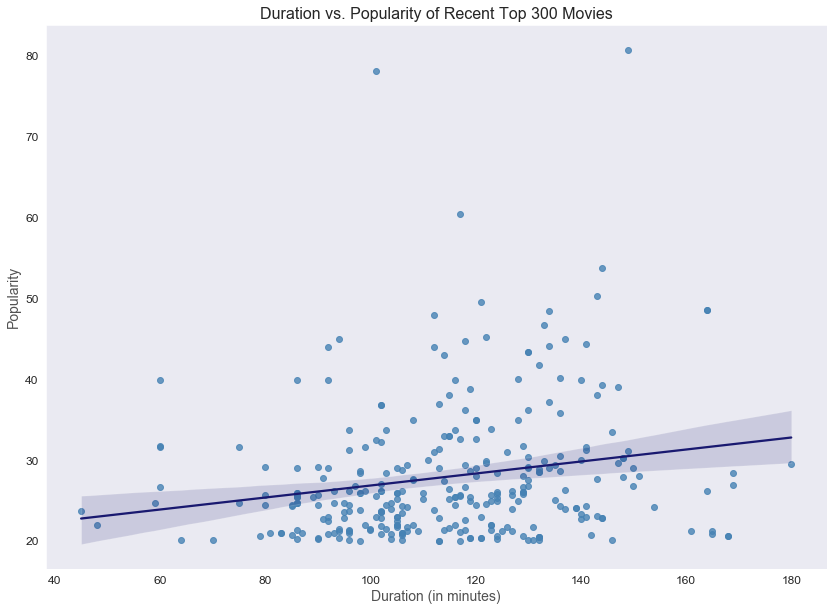

In [36]:
# Graph to show relationship between duration and popularity of Recent Top 300 Movies
plt.figure(figsize=(14, 10))
sns.set_style('dark')
sns.regplot(x='runtime_minutes', y='popularity', data=top_runtime_pop, 
            scatter_kws={'color': 'steelblue'}, line_kws={'color': 'midnightblue'})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Duration (in minutes)', fontsize=14, alpha=0.8)
plt.ylabel('Popularity', fontsize=14, alpha=0.8)
plt.title('Duration vs. Popularity of Recent Top 300 Movies', fontsize=16)
plt.show()

### Comment: Most of the popular movies have a duration of about 120 minutes

# Average duration of most profitable movies

In [37]:
# Choose only 300 movies that have duration less than 300 minutes and sort it by profit in descending order
cur.execute('''SELECT movie_pro.*, original_title, start_year, runtime_minutes
               FROM run_time
               JOIN movie_pro
               ON run_time.original_title = movie_pro.title
               WHERE runtime_minutes < 300
               ORDER BY profit DESC
               LIMIT 300;''')
top_runtime_pro = pd.DataFrame(cur.fetchall())
top_runtime_pro.columns = [i[0] for i in cur.description]
top_runtime_pro.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit,original_title,start_year,runtime_minutes
0,7,2018-04-27 00:00:00,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,2018,149.0
1,34,2015-06-12 00:00:00,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,2015,124.0
2,27,2012-05-04 00:00:00,The Avengers,225000000,623279547,1517935897,1292935897,The Avengers,2012,143.0
3,42,2018-02-16 00:00:00,Black Panther,200000000,700059566,1348258224,1148258224,Black Panther,2018,134.0
4,13,2018-06-22 00:00:00,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Jurassic World: Fallen Kingdom,2018,128.0


In [38]:
# Display statistical information
top_runtime_pro.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,start_year,runtime_minutes
count,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,300.000000,300.000000
mean,50.033333,1.169607e+08,2.025625e+08,5.521312e+08,4.351705e+08,2014.213333,106.830000
std,25.950536,6.819592e+07,1.110297e+08,2.918827e+08,2.513123e+08,2.542184,31.183475
min,2.000000,5.000000e+06,3.276600e+04,2.070398e+08,1.849221e+08,2010.000000,3.000000
25%,31.000000,6.400000e+07,1.366772e+08,3.424165e+08,2.559979e+08,2012.000000,92.000000
50%,47.500000,1.250000e+08,1.773975e+08,4.577066e+08,3.480480e+08,2014.000000,107.000000
75%,69.000000,1.650000e+08,2.344030e+08,6.996192e+08,5.451193e+08,2016.000000,127.250000
max,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,2018.000000,180.000000


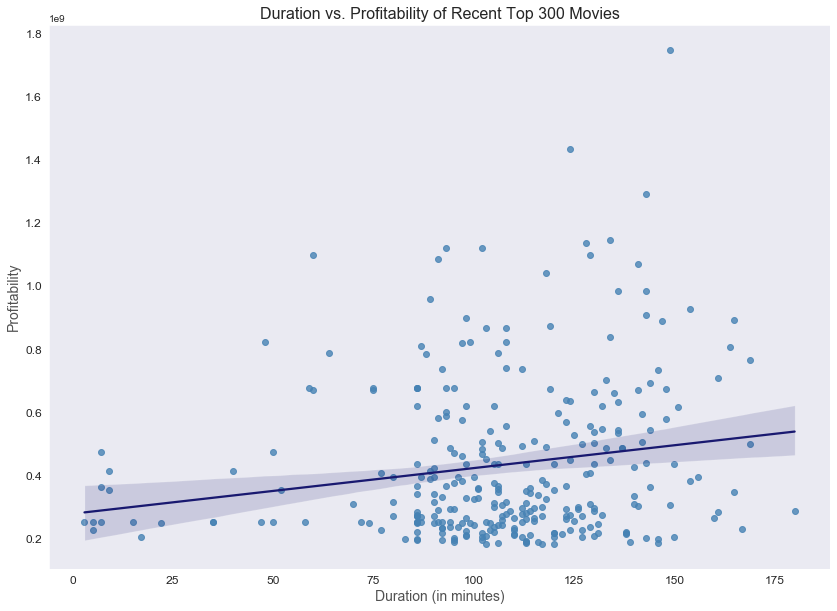

In [40]:
# Graph to show relationship between duration and profitability of Recent Top 300 Movies
plt.figure(figsize=(14, 10))
sns.set_style('dark')
sns.regplot(x='runtime_minutes', y='profit', data=top_runtime_pro, 
            scatter_kws={'color': 'steelblue'}, line_kws={'color': 'midnightblue'})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Duration (in minutes)', fontsize=14, alpha=0.8)
plt.ylabel('Profitability', fontsize=14, alpha=0.8)
plt.title('Duration vs. Profitability of Recent Top 300 Movies', fontsize=16)
plt.show()

### Comment: Most of the profitable movies have a duration of about 115 minutes